In [ ]:
# Prerequisites:
!pip install torch
!pip install docling_core
!pip install transformers
!pip install bitsandbytes
!pip install accelerate
!pip install flash-attn --no-build-isolation

In [ ]:
from PIL import Image
from pathlib import Path

In [ ]:
import torch
from docling_core.types.doc import DoclingDocument
from docling_core.types.doc.document import DocTagsDocument
from transformers import AutoProcessor, AutoModelForVision2Seq
from transformers.image_utils import load_image
from pathlib import Path

DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

# Initialize processor and model
processor = AutoProcessor.from_pretrained("ds4sd/SmolDocling-256M-preview")
model = AutoModelForVision2Seq.from_pretrained(
    "ds4sd/SmolDocling-256M-preview",
    torch_dtype=torch.bfloat16,
    _attn_implementation="eager",
).to(DEVICE)

# Create input messages
messages = [
    {
        "role": "user",
        "content": [
            {"type": "image"},
            {"type": "text", "text": (
                "Convert this page to docling."
                )
            }
        ]
    },
]

# Prepare inputs
prompt = processor.apply_chat_template(messages, add_generation_prompt=True)
outputs = {}

filepath = Path("./UB04 Hill not great quality.tif")
with open(filepath, 'rb') as f:
  image = Image.open(f)
  image = load_image(image)



inputs = processor(text=prompt, images=[image], return_tensors="pt")
inputs = inputs.to(DEVICE)

#Generate outputs
print(f"Generating for {filepath}")
generated_ids = model.generate(**inputs, max_new_tokens=8192)
prompt_length = inputs.input_ids.shape[1]
trimmed_generated_ids = generated_ids[:, prompt_length:]
doctags = processor.batch_decode(
    trimmed_generated_ids,
    skip_special_tokens=False,
)[0].lstrip()
print("OK")

# Populate document
doctags_doc = DocTagsDocument.from_doctags_and_image_pairs([doctags], [image])
# print(doctags)
# create a docling document
doc = DoclingDocument(name="Document")
doc.load_from_doctags(doctags_doc)

# export as any format
# HTML
# Path("Out/").mkdir(parents=True, exist_ok=True)
# output_path_html = Path("Out/") / "example.html"
# doc.save_as_html(output_path_html)
# MD


DoclingDocument(schema_name='DoclingDocument', version='1.3.0', name='Document', origin=None, furniture=GroupItem(self_ref='#/furniture', parent=None, children=[], content_layer=<ContentLayer.FURNITURE: 'furniture'>, name='_root_', label=<GroupLabel.UNSPECIFIED: 'unspecified'>), body=GroupItem(self_ref='#/body', parent=None, children=[RefItem(cref='#/texts/0'), RefItem(cref='#/texts/1'), RefItem(cref='#/texts/2'), RefItem(cref='#/texts/3'), RefItem(cref='#/texts/4'), RefItem(cref='#/texts/5'), RefItem(cref='#/texts/6'), RefItem(cref='#/texts/7'), RefItem(cref='#/texts/8'), RefItem(cref='#/texts/9'), RefItem(cref='#/texts/10'), RefItem(cref='#/texts/11'), RefItem(cref='#/texts/12'), RefItem(cref='#/texts/13'), RefItem(cref='#/texts/14'), RefItem(cref='#/texts/15'), RefItem(cref='#/texts/16'), RefItem(cref='#/texts/17'), RefItem(cref='#/texts/18'), RefItem(cref='#/texts/19'), RefItem(cref='#/texts/20'), RefItem(cref='#/texts/21'), RefItem(cref='#/texts/22'), RefItem(cref='#/texts/23'), R
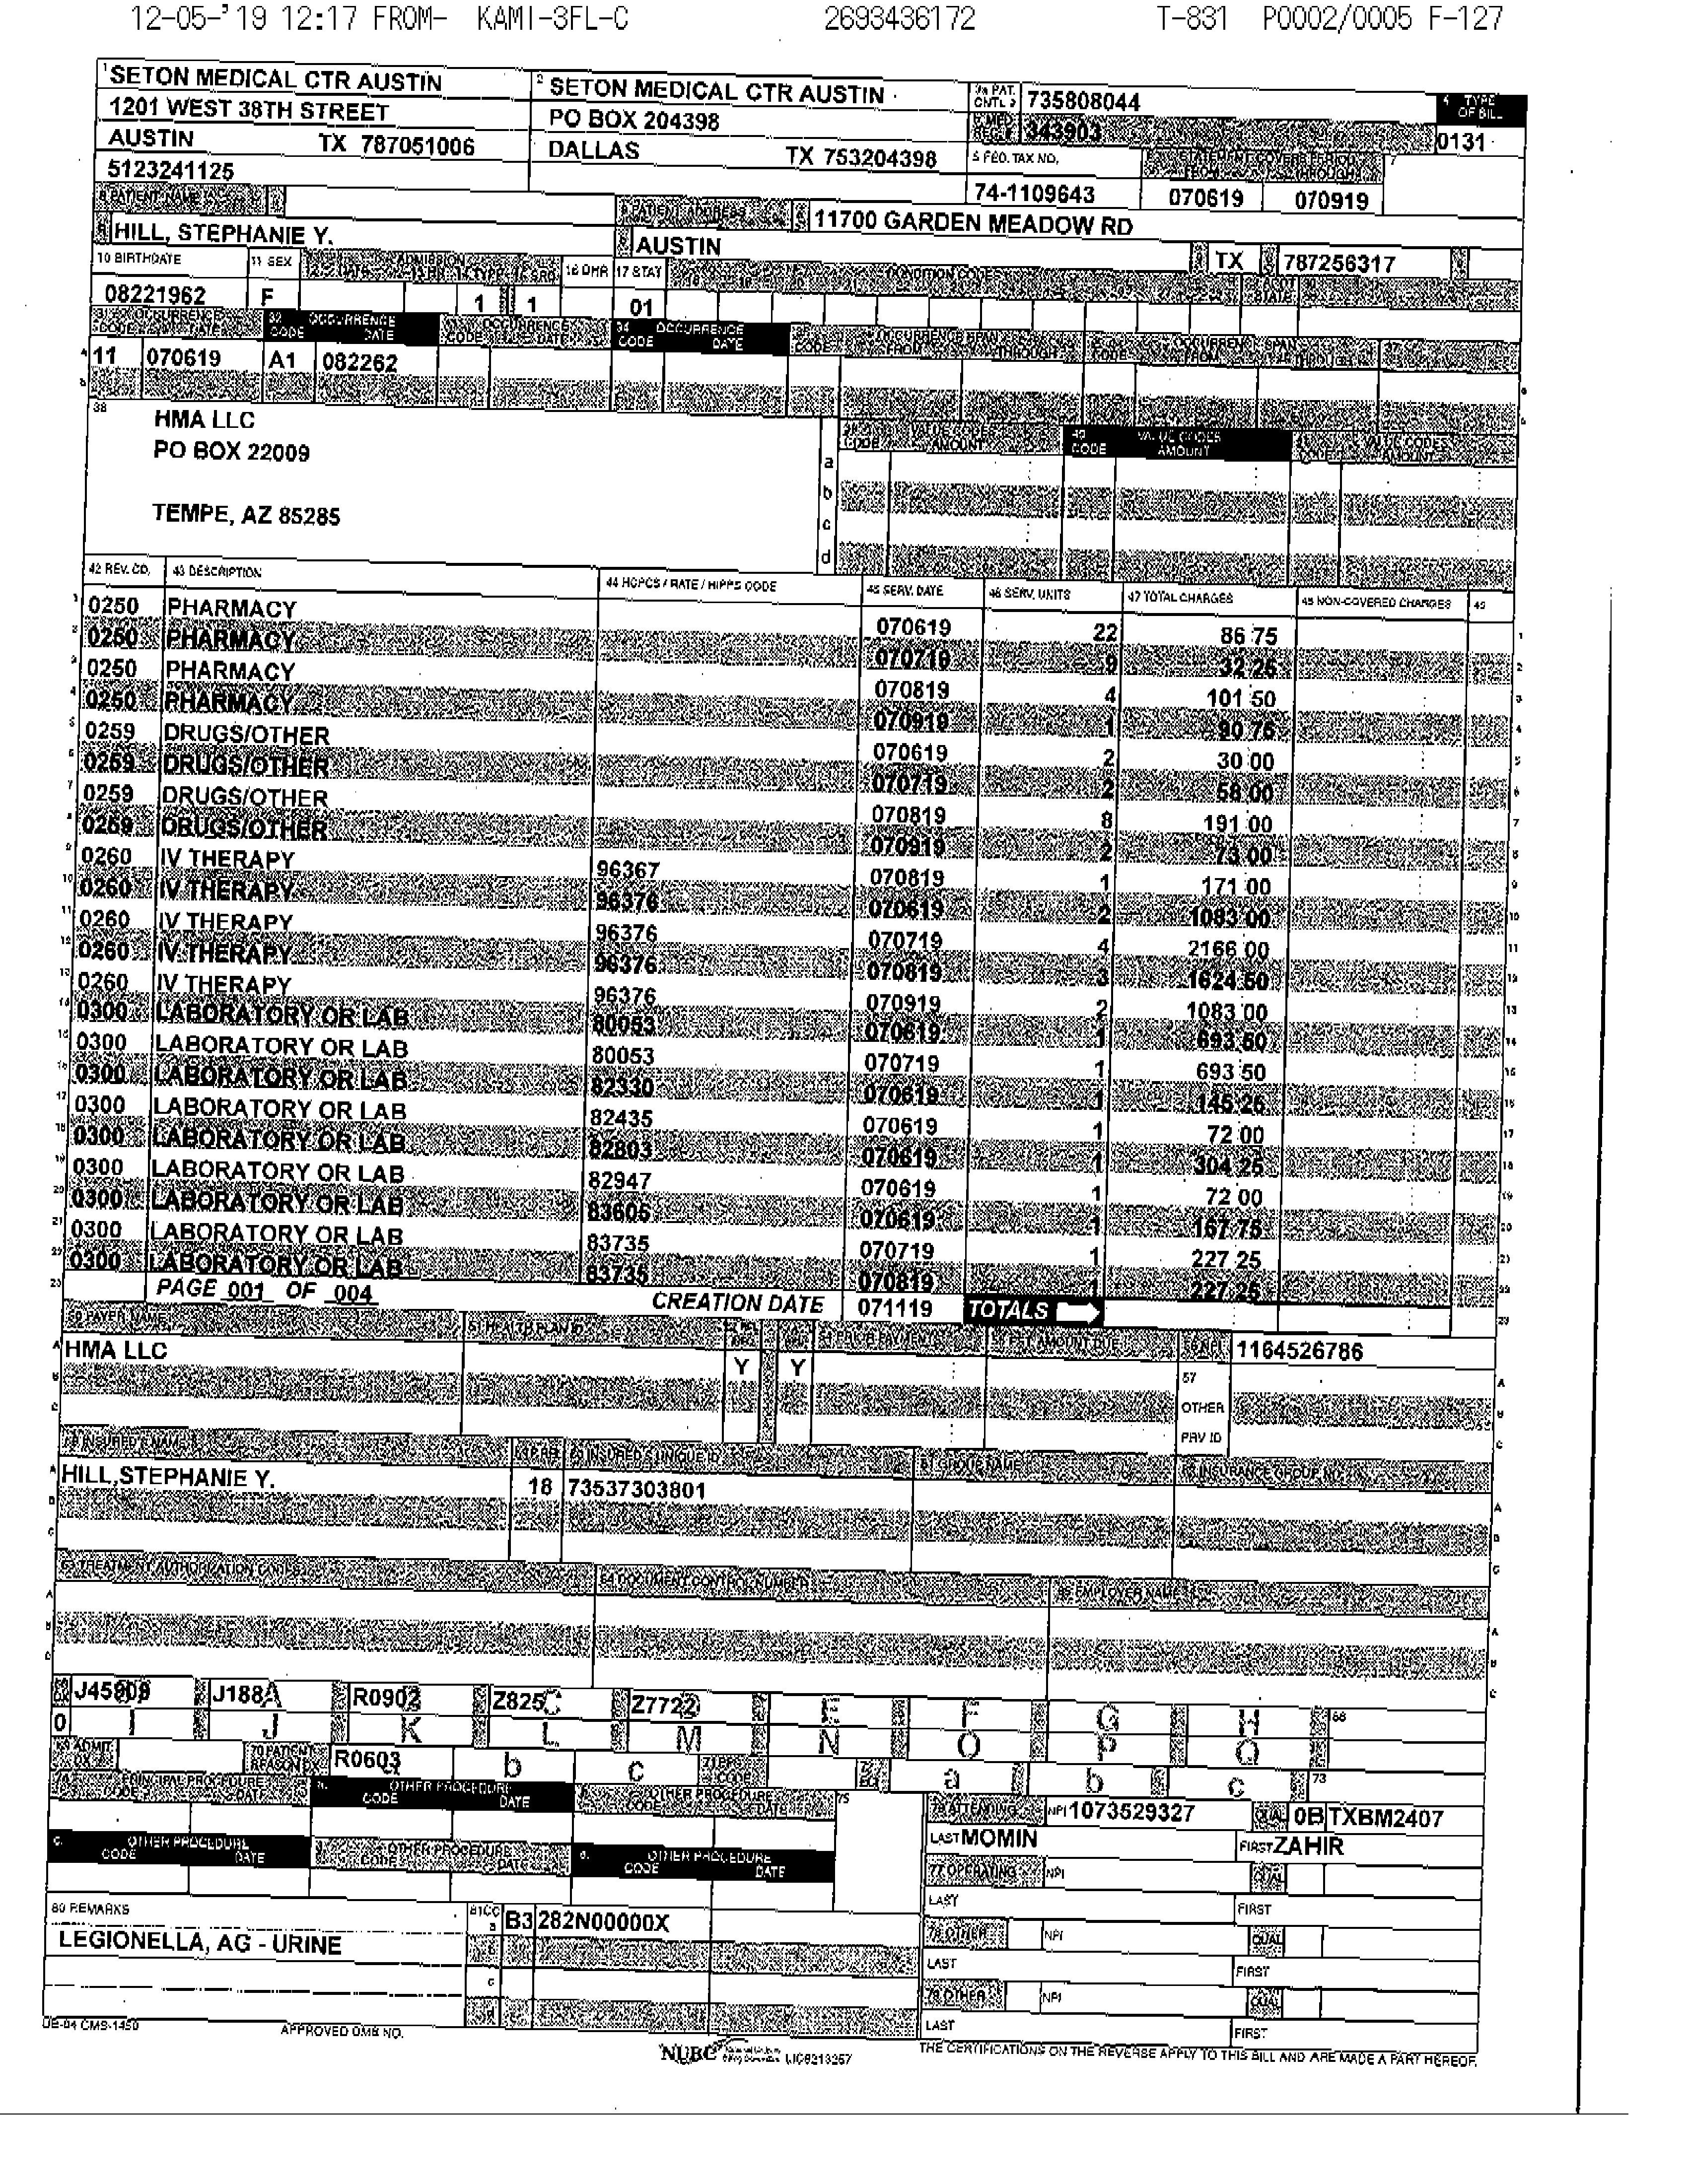

In [ ]:
doc

In [ ]:
  doc_dict = doc.export_to_dict()

In [ ]:
doc_dict.keys()

dict_keys(['schema_name', 'version', 'name', 'furniture', 'body', 'groups', 'texts', 'pictures', 'tables', 'key_value_items', 'form_items', 'pages'])

In [ ]:
doc_dict['texts']

[{'self_ref': '#/texts/0',
  'parent': {'$ref': '#/body'},
  'children': [],
  'content_layer': 'furniture',
  'label': 'page_header',
  'prov': [{'page_no': 1,
    'bbox': {'l': 41.472,
     't': 26.400000000000002,
     'r': 732.672,
     'b': 57.199999999999996,
     'coord_origin': 'TOPLEFT'},
    'charspan': [0, 58]}],
  'orig': 'DocuSign Envelope ID: 91F18D4C-F834-4F7C-A97F-D9675E12678A',
  'text': 'DocuSign Envelope ID: 91F18D4C-F834-4F7C-A97F-D9675E12678A'},
 {'self_ref': '#/texts/1',
  'parent': {'$ref': '#/body'},
  'children': [],
  'content_layer': 'body',
  'label': 'text',
  'prov': [{'page_no': 1,
    'bbox': {'l': 483.84000000000003,
     't': 44.0,
     'r': 770.688,
     'b': 114.39999999999999,
     'coord_origin': 'TOPLEFT'},
    'charspan': [0, 41]}],
  'orig': '854 Scenic View Court NIXA, MO 65714-7609',
  'text': '854 Scenic View Court NIXA, MO 65714-7609'},
 {'self_ref': '#/texts/2',
  'parent': {'$ref': '#/body'},
  'children': [],
  'content_layer': 'body',
  

In [ ]:
print(doc.export_to_text())

854 Scenic View Court NIXA, MO 65714-7609

PATIENTNAME: PATIENTNUMBER: GUARANTORID: DATEOF SERVICE: OF ACCOUNT

Burris, Coalson Glendon

2000151537811

106001528

INSURANCE COMPANY:NAME

Blue Cross and Blue Shield - BCOBS Traditional

## GUARANTORNAME&amp;ADDRESS:

Amanda C Burris 4050 SHULL RD HARTVILLE MO 65667

## Mercy - P O Box 505557 - St. Louis, MO 63150-5557

## Professional Charges

Procedure code Description

73130 Radex Hand Minimum 3 Views

Professional Payments and Adjustments

Date Description 01/31/24 Blue Cross and Blue Shield Payments

Account Balance: $35.00

Total Charges: $35.00

IMPORTANT: RETURN THE BOTTOM PORTION OF THIS STATEMENT WITH YOUR PAYMENT TO ASSUCH PROPER CREDIT. DO NOT ENCLOSE INQUIRIES WITH YOUR PAYMENT.

## GUARANTORNAME&amp;ADDRESS:

Amanda C Burris 4050 SHULL RD HARTVILLE MO 65667

PATIENTNUMBER:

NOTE: AMOUNTS INDICATED TO BE PAID BY THIRD PARTIES ARE ESTIMATED BY THE HOSPITAL. HOWEVER THE PATIENT AND/OR RESPONSIBLE PARTY HAVE PERSONALLY GUARANTEE

In [ ]:
!pip install rapidocr

In [ ]:
!pip install docling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 6.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.2/48.2 kB 4.1 MB/s eta 0:00:00
  Using cached ninja-1.11.1.4-py3-none-manylinux_2_12_x86_64.manylinux2010_x86_64.whl.metadata (5.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.4/160.4 kB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 71.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 72.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.1/42.1 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 66.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.3/244.3 kB 20.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 472.8/472.8 kB 26.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 541.1/541.1 kB 35

In [ ]:
from pathlib import Path

In [ ]:
from docling.datamodel.base_models import InputFormat
from docling.datamodel.pipeline_options import (
    PdfPipelineOptions,
    TesseractCliOcrOptions,
    TesseractOcrOptions,
)
from docling.document_converter import DocumentConverter, PdfFormatOption

In [ ]:
def main():
    input_doc = Path("./Burris 1500 forms.tif")

    # Set lang=["auto"] with a tesseract OCR engine: TesseractOcrOptions, TesseractCliOcrOptions
    # ocr_options = TesseractOcrOptions(lang=["auto"])
    ocr_options = TesseractCliOcrOptions(lang=["auto"])

    pipeline_options = PdfPipelineOptions(
        do_ocr=True, force_full_page_ocr=True, ocr_options=ocr_options
    )

    converter = DocumentConverter(
        format_options={
            InputFormat.PDF: PdfFormatOption(
                pipeline_options=pipeline_options,
            )
        }
    )

    doc = converter.convert(input_doc).document
    md = doc.export_to_markdown()
    print(md)

In [ ]:
main()

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


DocuSign Envelope ID: 91F18DAC-FB344F7C-A97F-D9675E12678A

## R Davies Satellite

<!-- image -->

854 Scenic View Court NIXA, MO 65714-7609

02/02/24

## Mercyir

#

ITEMIZED STATEMENT OF ACCOUNT

Burris, Coalson Glendon

2000151537811

106001528

01/13/2024

FFOR QUESTIONS REGARDING THIS STATEMENT, PLEASE CALL

Blue Cross and Blue Shield BCBS Tradilional

(855 420-7900)

Amanda C Burris 4050 SHULL RD HARTVILLE MO 65667

RETURN THE BOTTOM PORTION OF THE LAST PAGE OF THIS STATEMENT WITH YOUR PAYMENT TO ASSURE PROPER CREDIT .

DO NOT ENCLOSE INQUIRIES WITH YOUR PAYMENT

Make Checks Payable to:

Mercy P 0 Box 505557 2 St. Louis, MO 63150-5557

## Professional Charges

@ty

Amount

Date

Rev Code

35,00

01/13/24

73130

Radex Hand Minimum 3 Vlews

Professional Payments and Adjustments

Amount]

Date

Description Blue Cross\_and Blue Shield Payments

0.o0]

01/31/24

Account Balance: $35.00

Total Charges: $35.00

IMPORTANT: DO NOT ENCLOSE INQUIRIES WITH YOUR PAYMENT.

AMOUNT

PAYMENT AMOU